<a href="https://colab.research.google.com/github/JohnYCLam/MachineLearning/blob/main/TensorFlow_and_PyTorch_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST Dataset Demo - Tensorflow

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
image = x_train[0]
label = y_train[0]

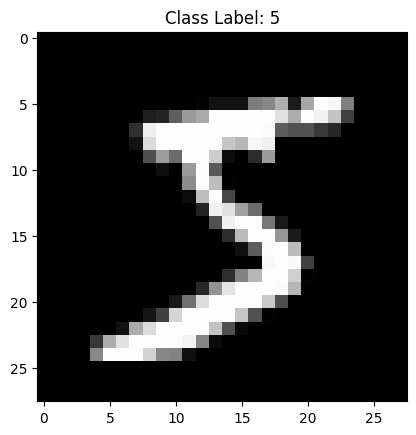

In [ ]:
fig, ax = plt.subplots()
plt.imshow(image.squeeze(), cmap = "gray")
ax.set_title(f'Class Label: {label}')
plt.show();

In [ ]:
image.shape

(28, 28)

In [ ]:
import numpy as np

output_shape = len(np.unique(y_train))

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, Dense, Input

In [ ]:
def simpleModel(input_shape, output_shape, act_units, drop_outs = None, act_fcn = 'relu'):

    model_sequence = [Input(shape = input_shape), Flatten()]
    for i in range(len(act_units)):
        model_sequence.append(Dense(act_units[i], activation = act_fcn))
        if type(drop_outs) == list:
            model_sequence.append(Dropout(drop_outs[i]))
    model_sequence.append(Dense(output_shape, activation = 'softmax'))
    model = tf.keras.models.Sequential(model_sequence)
    return model

In [ ]:
model = simpleModel(image.shape, output_shape, [128], [0.2])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# difference between sparse categorical crossentropy and categorical crossentropy
# categorical crossentropy: the labels are in one-hot encoding, e.g. [0, 0, 0, 1]
# sparse categorical crossentropy: the labels are single values. e.g. 3
# https://stackoverflow.com/questions/58565394/what-is-the-difference-between-sparse-categorical-crossentropy-and-categorical-c
def model_train(model, x_train, y_train, x_test, y_test, loss, optimizer = 'adam', metrics = ['accuracy'], epochs = 10):

    model.compile(optimizer = optimizer, loss = loss, metrics = metrics)
    result = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = epochs)
    return result

In [ ]:
result = model_train(model, x_train, y_train, x_test, y_test, 'sparse_categorical_crossentropy')

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8572 - loss: 0.4822 - val_accuracy: 0.9601 - val_loss: 0.1342
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9561 - loss: 0.1481 - val_accuracy: 0.9699 - val_loss: 0.0973
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9685 - loss: 0.1062 - val_accuracy: 0.9725 - val_loss: 0.0841
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9743 - loss: 0.0829 - val_accuracy: 0.9751 - val_loss: 0.0787
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9760 - loss: 0.0732 - val_accuracy: 0.9777 - val_loss: 0.0734
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9808 - loss: 0.0601 - val_accuracy: 0.9806 - val_loss: 0.0651
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9815 - loss: 0.0569 - val_accuracy: 0.9793 - val_loss: 0.0705
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9839 - loss: 0.0470

In [ ]:
#if we use categorical crossentropy, we have to convert the labels into one-hot encoding first

y_train = tf.one_hot(y_train, depth = 10)
y_test = tf.one_hot(y_test, depth = 10)

model_2 = simpleModel(image.shape, output_shape, [128], [0.2])
result_2 = model_train(model_2, x_train, y_train, x_test, y_test, 'categorical_crossentropy')

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8526 - loss: 0.4962 - val_accuracy: 0.9613 - val_loss: 0.1355
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9563 - loss: 0.1507 - val_accuracy: 0.9676 - val_loss: 0.1001
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9652 - loss: 0.1140 - val_accuracy: 0.9708 - val_loss: 0.0904
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9730 - loss: 0.0870 - val_accuracy: 0.9774 - val_loss: 0.0786
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9768 - loss: 0.0736 - val_accuracy: 0.9774 - val_loss: 0.0737
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9793 - loss: 0.0649 - val_accuracy: 0.9785 - val_loss: 0.0697
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9818 - loss: 0.0549 - val_accuracy: 0.9778 - val_loss: 0.0668
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9832 - loss: 0.0518 

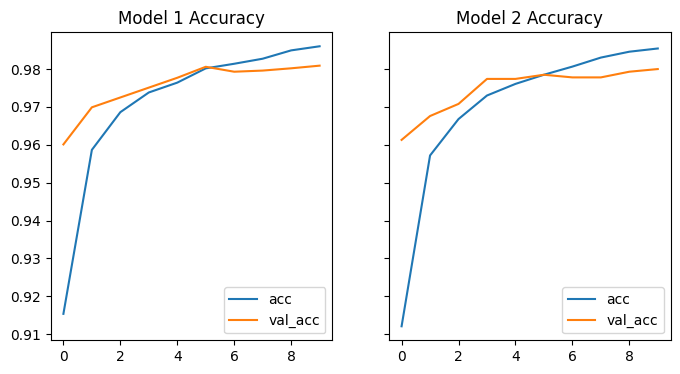

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (8, 4), sharey = True)

ax[0].plot(result.history['accuracy'], label = 'acc')
ax[0].plot(result.history['val_accuracy'], label = 'val_acc')
ax[0].set_title('Model 1 Accuracy')
ax[0].legend()
ax[1].plot(result_2.history['accuracy'], label = 'acc')
ax[1].plot(result_2.history['val_accuracy'], label = 'val_acc')
ax[1].set_title('Model 2 Accuracy')
ax[1].legend()
plt.show()

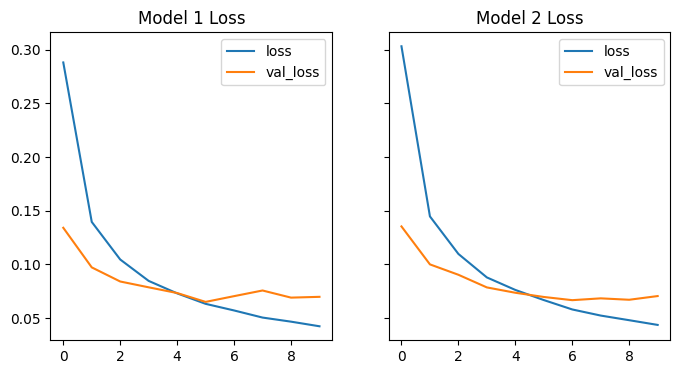

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (8, 4), sharey = True)

ax[0].plot(result.history['loss'], label = 'loss')
ax[0].plot(result.history['val_loss'], label = 'val_loss')
ax[0].set_title('Model 1 Loss')
ax[0].legend()
ax[1].plot(result_2.history['loss'], label = 'loss')
ax[1].plot(result_2.history['val_loss'], label = 'val_loss')
ax[1].set_title('Model 2 Loss')
ax[1].legend()
plt.show()

#MNIST Dataset Demo - PyTorch

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [ ]:
!pip install torchinfo
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 38.9 MB/s eta 0:00:00


In [ ]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

In [ ]:
train_data = torchvision.datasets.MNIST("data", train = True, download = True, transform = ToTensor())
test_data = torchvision.datasets.MNIST("data", train = False, download = True, transform = ToTensor())

print(f'No. of training data: {len(train_data)} | No. of test data: {len(test_data)}')

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 178MB/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 20.6MB/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 76.2MB/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.25MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

No. of training data: 60000 | No. of test data: 10000


In [ ]:
image, label = train_data[0]
image.shape, label

(torch.Size([1, 28, 28]), 5)

In [ ]:
class_names = train_data.classes
print(class_names)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


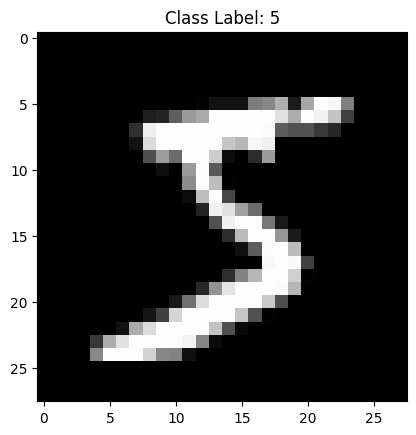

In [ ]:
fig, ax = plt.subplots()
plt.imshow(image.squeeze(), cmap = "gray")
ax.set_title(f'Class Label: {label}')
plt.show();

In [ ]:
class simplePyTorchModel(nn.Module):
    def __init__(self, input_shape, output_shape, act_units, drop_outs = None, act_fcn = 'relu'):
        super().__init__()
        model_sequence = [nn.Flatten()]

        act_units.insert(0, input_shape)

        for i in range(len(act_units) - 1):

            model_sequence.append(nn.Linear(act_units[i], act_units[i + 1]))

            if act_fcn == 'relu':
                model_sequence.append(nn.ReLU())
            elif act_fcn == 'tanh':
                model_sequence.append(nn.Tanh())
            elif act_fcn == 'sigmoid':
                model_sequence.append(nn.Sigmoid())
            else:
                raise Exception("Unsupported Activation Function")

            if type(drop_outs) == list:
                model_sequence.append(nn.Dropout(drop_outs[i]))

        model_sequence.append(nn.Linear(act_units[-1], output_shape))

        self.block = nn.Sequential(*model_sequence)

    def forward(self, x):
        return self.block(x)

In [ ]:
model = simplePyTorchModel(image.shape[1] * image.shape[2], len(class_names), [128], [0.2])
model.to(device)

simplePyTorchModel(
  (block): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [ ]:
from torchinfo import summary

summary(model, input_size = (50000, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
simplePyTorchModel                       [50000, 10]               --
├─Sequential: 1-1                        [50000, 10]               --
│    └─Flatten: 2-1                      [50000, 784]              --
│    └─Linear: 2-2                       [50000, 128]              100,480
│    └─ReLU: 2-3                         [50000, 128]              --
│    └─Dropout: 2-4                      [50000, 128]              --
│    └─Linear: 2-5                       [50000, 10]               1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (G): 5.09
Input size (MB): 156.80
Forward/backward pass size (MB): 55.20
Params size (MB): 0.41
Estimated Total Size (MB): 212.41

In [ ]:
from torch.utils.data import DataLoader

def dataloader(train_data, test_data, batch_size):

    train_dataloader = DataLoader(train_data, batch_size = batch_size, shuffle = True)
    test_dataloader = DataLoader(test_data, batch_size = batch_size, shuffle = False)

    return train_dataloader, test_dataloader

In [ ]:
train_dataloader, test_dataloader = dataloader(train_data, test_data, 32)

print(f'Number of batches in train data: {len(train_dataloader)}')
print(f'Number of batches in test data: {len(test_dataloader)}')

Number of batches in train data: 1875
Number of batches in test data: 313


In [ ]:
import torchmetrics

acc_fcn = torchmetrics.Accuracy(task = 'multiclass', num_classes = len(class_names)).to(device)
loss_fcn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.001)

In [ ]:
def train_step(model, device, loss_fcn, acc_fcn, optimizer, train_dataloader):

    train_loss = 0
    train_acc = 0

    model.train()

    for batch, (X_train, y_train) in enumerate(train_dataloader):
        X_train = X_train.to(device)
        y_train = y_train.to(device)

        y_train_pred = model(X_train)

        batch_loss = loss_fcn(y_train_pred, y_train)
        train_loss += batch_loss
        train_acc += acc_fcn(y_train_pred, y_train)

        optimizer.zero_grad()

        batch_loss.backward()

        optimizer.step()

        if batch % 400 == 0:
            print(f'Read through {batch * len(X_train)}/{len(train_dataloader.dataset)} samples')

    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    return train_loss, train_acc


In [ ]:
def test_step(model, device, loss_fcn, acc_fcn, optimizer, test_dataloader):

    test_loss = 0
    test_acc = 0

    model.eval()

    with torch.inference_mode():
        for X_test, y_test in test_dataloader:

            X_test = X_test.to(device)
            y_test = y_test.to(device)

            y_test_pred = model(X_test)

            test_loss += loss_fcn(y_test_pred, y_test)
            test_acc += acc_fcn(y_test_pred, y_test)

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

def model_training(model, device, loss_fcn, acc_fcn, optimizer, train_dataloader, test_dataloader, epochs = 10):

    results = {'train_acc': [], 'train_loss': [], 'test_acc': [], 'test_loss': []}

    total_start_time = timer()
    for epoch in tqdm(range(epochs)):
        epoch_start_time = timer()
        print(f'Epoch: {epoch + 1}')

        train_loss, train_acc = train_step(model, device, loss_fcn, acc_fcn, optimizer, train_dataloader)

        test_loss, test_acc = test_step(model, device, loss_fcn, acc_fcn, optimizer, test_dataloader)

        results['train_loss'].append(train_loss)
        results['train_acc'].append(train_acc)
        results['test_loss'].append(test_loss)
        results['test_acc'].append(test_acc)

        epoch_end_time = timer()

        print(f"\nEpoch Train Time: {epoch_end_time - epoch_start_time:.4f}")
        print(f"Train Accuracy: {train_acc:.4f} | Train Loss: {train_loss:.4f} | Test Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f} \n")

    total_end_time = timer()
    print(f"Total Time: {total_end_time - total_start_time:.4f}")

    return results

In [ ]:
results = model_training(model, device, loss_fcn, acc_fcn, optimizer, train_dataloader, test_dataloader)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1
Read through 0/60000 samples
Read through 12800/60000 samples
Read through 25600/60000 samples
Read through 38400/60000 samples
Read through 51200/60000 samples

Epoch Train Time: 19.9091
Train Accuracy: 0.9535 | Train Loss: 0.1584 | Test Accuracy: 0.9664 | Test Loss: 0.1108 

Epoch: 2
Read through 0/60000 samples
Read through 12800/60000 samples
Read through 25600/60000 samples
Read through 38400/60000 samples
Read through 51200/60000 samples

Epoch Train Time: 22.7614
Train Accuracy: 0.9664 | Train Loss: 0.1150 | Test Accuracy: 0.9715 | Test Loss: 0.0926 

Epoch: 3
Read through 0/60000 samples
Read through 12800/60000 samples
Read through 25600/60000 samples
Read through 38400/60000 samples
Read through 51200/60000 samples

Epoch Train Time: 18.2506
Train Accuracy: 0.9701 | Train Loss: 0.0962 | Test Accuracy: 0.9727 | Test Loss: 0.0858 

Epoch: 4
Read through 0/60000 samples
Read through 12800/60000 samples
Read through 25600/60000 samples
Read through 38400/60000 samples
Re

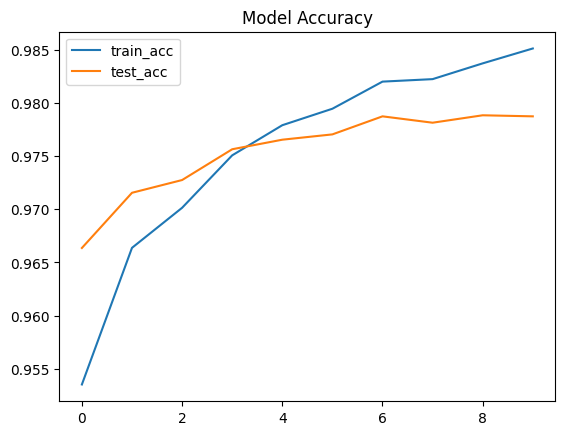

In [ ]:
fig, ax = plt.subplots()

ax.plot(results['train_acc'], label = 'train_acc')
ax.plot(results['test_acc'], label = 'test_acc')
ax.set_title('Model Accuracy')
ax.legend()
plt.show()

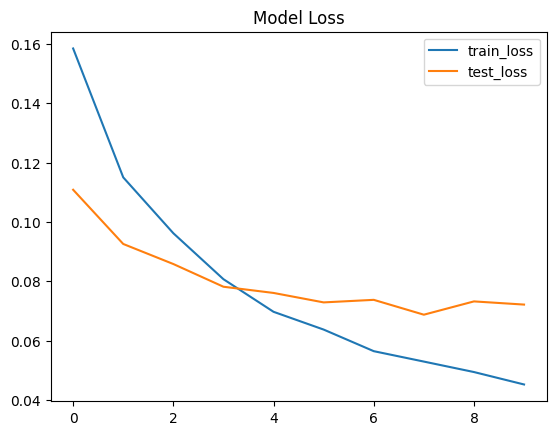

In [ ]:
fig, ax = plt.subplots()
results['train_loss'] = [loss.detach().numpy() for loss in results['train_loss']]
ax.plot(results['train_loss'], label = 'train_loss')
ax.plot(results['test_loss'], label = 'test_loss')
ax.set_title('Model Loss')
ax.legend()
plt.show()